<a href="https://colab.research.google.com/github/julianovale/simulacao_python/blob/master/0002_compartilhamento_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulando compartilhamento de bicicletas

Caso:

Há um bicicletário em cada universidade (Olin e Wellesley), cada um com capacidade para 12 biclicetas. Há, no total, 12 bicicletas compartilhadas entre as universidades.

A cada 2 minutos, um estudante toma uma bicicleta em Olin e vai para Wellesley. A cada 3 minutos, um estudante toma uma bicileta em Wellesley e vai para Olin.

Vamos simular os dois bicicletários e o movimento de bikes entre eles.


## Instalando e importando as bibliotecas necessárias

In [180]:
! pip install modsimpy

In [181]:
! pip install pint

In [182]:
from modsim import *

## Estado inicial

In [183]:
bikeshare = State(olin = 10, wellesley = 2) # State é da MODSIM Library

In [184]:
bikeshare.olin

10

In [185]:
bikeshare.wellesley

2

In [186]:
bikeshare

,values
olin,10
wellesley,2


## Assumindo novos valores

In [187]:
bikeshare.olin = 9
bikeshare.wellesley = 3

In [188]:
bikeshare

,values
olin,9
wellesley,3


## Atualizando valores

In [189]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

In [190]:
bikeshare

,values
olin,8
wellesley,4


## Criando função para atualizar valores

In [191]:
def bike_to_wellesley():
  bikeshare.olin -= 1
  bikeshare.wellesley += 1

In [192]:
def bike_to_olin():
  bikeshare.wellesley -= 1
  bikeshare.olin += 1

In [193]:
bike_to_wellesley()
bikeshare

,values
olin,7
wellesley,5


In [194]:
bike_to_olin()
bikeshare

,values
olin,8
wellesley,4


## Imprimindo valores

In [195]:

bikeshare.wellesley
bikeshare.olin
# se eu rodar esses comandos os dois serão rodados, mas será exibido só o valor do último, então, usando o print(), isso se resolve  

8

In [196]:
print(bikeshare.wellesley)
print(bikeshare.olin)

4
8


In [197]:
print(bikeshare.wellesley, bikeshare.olin)

4 8


In [198]:
def bike_to_wellesley():
  print('movendo uma bike para Wellesley')
  bikeshare.olin -= 1
  bikeshare.wellesley += 1

In [199]:
def bike_to_olin():
  print('movendo uma bike para Olin')
  bikeshare.wellesley -= 1
  bikeshare.olin += 1

In [200]:
bike_to_olin()

movendo uma bike para Olin


In [201]:
bike_to_wellesley()

movendo uma bike para Wellesley


In [202]:
bikeshare

,values
olin,8
wellesley,4


## If

In [203]:
flip(0.7) # MODSIM library: gera aleatoriamente "True" ou "False", neste caso: (flip) com 70% de chance de "True"; ou, (flop) para 30% de "False".


True

In [204]:
# Um exemplo de uso
if flip(0.5):
  print("cara")
else:
  print("coroa")

coroa


Veja:

Se um estudante sai de Olin para Wellesley a cada 2 minutos, a probabilidade de em um minuto particular partir um estudante nesse sentido é de 0.5; e sai um estudante de Wellesley para Olin a cada 3 minutos, então a probabilidade num dado minuto de sair um estudante é de 0.33. Vamos modelar isso:

In [205]:
if flip(0.5):
  bike_to_wellesley()

In [206]:
if flip(0.33):
  bike_to_olin()

Vamos modelar o que pode ocorrer num minuto particular (um passo do modelo):

In [207]:
def step():
  if flip(0.5):
    bike_to_wellesley()
  if flip(0.33):
    bike_to_olin()

In [208]:
step()

movendo uma bike para Wellesley


In [209]:
bikeshare

,values
olin,7
wellesley,5


## Parâmetros e argumentos

In [210]:
def step(p1, p2): # p1 e p2 são parâmetros da função
  if flip(p1):
    bike_to_wellesley()
  
  if flip(p2):
    bike_to_olin()

In [211]:
step(0.5, 0.33) # 0.5 e 0.33 são argumentos

movendo uma bike para Wellesley
movendo uma bike para Olin


## For

In [212]:
for i in range(4):
  bike_to_wellesley()

movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley


## Time series

In [213]:
results = TimeSeries() # TimeSeries é da biblioteca MODSIM

In [214]:
results[0] = bikeshare.olin

In [215]:
for i in range(10):
  step(0.3, 0.2)
  results[i] = bikeshare.olin

movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Olin
movendo uma bike para Wellesley
movendo uma bike para Olin
movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley


In [216]:
results

,values
0,3
1,2
2,1
3,1
4,0
5,1
6,0
7,-1
8,-2
9,-2


In [217]:
results.mean()

0.3

## Plotting

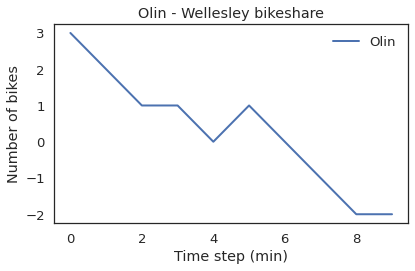

In [218]:
plot(results, label = "Olin")
decorate(title = "Olin - Wellesley bikeshare",
         xlabel = "Time step (min)",
         ylabel = "Number of bikes")

## Modelo iterativo

In [219]:
def bike_to_wellesley(state):
  print('movendo uma bike para Wellesley')
  state.olin -= 1
  state.wellesley += 1

In [220]:
def bike_to_olin(state):
  print('movendo uma bike para Olin')
  state.wellesley -= 1
  state.olin += 1

In [221]:
bike_to_wellesley(bikeshare)

movendo uma bike para Wellesley


In [222]:
bikeshare

,values
olin,-3
wellesley,15


In [223]:
bike_to_olin(bikeshare)

movendo uma bike para Olin


In [224]:
bikeshare

,values
olin,-2
wellesley,14


In [225]:
bikeshare1 = State(olin = 10, wellesley = 2)
bikeshare2 = State(olin = 2, wellesley = 10)
bikeshare3 = State(olin = 6, wellesley = 6)

In [226]:
bike_to_wellesley(bikeshare1)
bike_to_olin(bikeshare2)
bike_to_wellesley(bikeshare3)

movendo uma bike para Wellesley
movendo uma bike para Olin
movendo uma bike para Wellesley


In [227]:
print(bikeshare)
print(bikeshare1)
print(bikeshare2)
print(bikeshare3)

olin         -2
wellesley    14
dtype: int64
olin         9
wellesley    3
dtype: int64
olin         3
wellesley    9
dtype: int64
olin         5
wellesley    7
dtype: int64


## Evitando número negativo de bikes

In [232]:
bikeshare = State(olin = 10, wellesley = 2)

In [233]:
def bike_to_wellesley(state):
  if state.olin == 0:
    return
  print('movendo uma bike para Wellesley')
  state.olin -= 1
  state.wellesley += 1

def bike_to_olin(state):
  if state.wellesley == 0:
    return
  print('movendo uma bike para Olin')
  state.wellesley -= 1
  state.olin += 1

In [234]:
bikeshare

,values
olin,10
wellesley,2


In [235]:
bike_to_olin(bikeshare)
bike_to_olin(bikeshare)
bike_to_olin(bikeshare)
bike_to_olin(bikeshare)
bike_to_olin(bikeshare)
bike_to_olin(bikeshare)
bikeshare

movendo uma bike para Olin
movendo uma bike para Olin


,values
olin,12
wellesley,0
